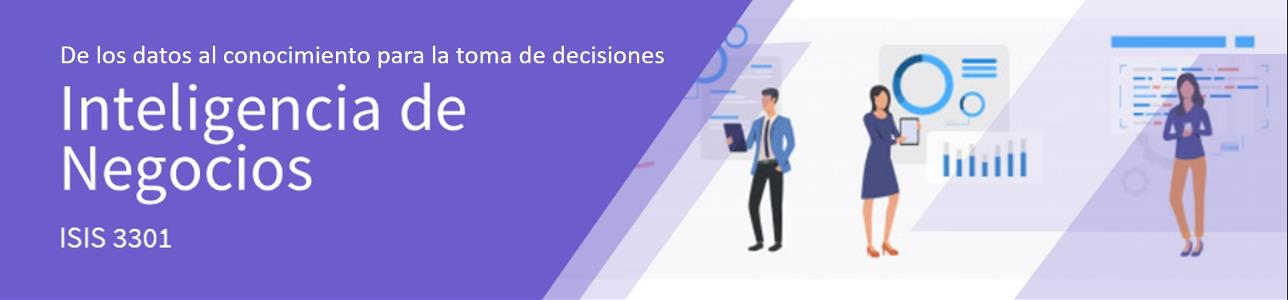

# **Proyecto 1 Etapa 1: Turismo de los Alpes**

## Objetivos

* Aplicar la metodología de analítica de textos para la construcción de soluciones de
analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.
* Planear la interacción con un grupo interdisciplinario para identificar usuarios y posibles
herramientas a desarrollar que faciliten la interacción del resultado del modelo analítico
desarrollado.


## Problema

El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y
Turística de Colombia – COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar,
Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están
interesados en analizar las características de sitios turísticos que los hacen atractivos para
turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual
manera, quieren comparar las características de dichos sitios, con aquellos que han
obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a
ellos. Adicionalmente, quieren tener un mecanismo para determinar la calificación que
tendrá un sitio por parte de los turistas y así, por ejemplo, aplicar estrategias para identificar
oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el
turismo.

## 1. Instalación e importación de librerías


In [435]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk

# Punkt permite separar un texto en frases.
nltk.download('punkt')

# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')

# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [436]:
# Manejo de gráficas
!pip install scikit-plot

# Se encarga de convertir números a palabras en español
!pip install num2words

In [437]:
# para la lematización en español, se usa la librería Spacy
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 20.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [438]:
# para detectar reseñas en otros idiomas
!pip install langdetect

In [439]:
# Instalación de librerias

import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
#!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
#import contractions
#import inflect
import statistics
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, SnowballStemmer
from num2words import num2words
from wordcloud import WordCloud
import spacy
from langdetect import detect
import joblib

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

## 2. Perfilamiento y entendimiento de los datos

### Lectura de los datos

In [440]:
path = os.path.join('tipo2_entrenamiento_estudiantes.csv') # tipo2 porque somos seccion 3

if not os.path.exists(path):
  path = os.path.join('data','tipo2_entrenamiento_estudiantes.csv')

In [441]:
# Uso de la libreria pandas para la lectura de archivos
data = pd.read_csv(path, sep=',', encoding='utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data

Se revisan los valores que toman las columnas en algunos registros:

In [442]:
data_t

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3
...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4
7871,"Fue una escapada de un día desde el complejo, ...",4
7872,La Plaza de la Revolución es un lugar emblemát...,3
7873,Es la segunda ocasión que me quedo en los cuar...,1


In [443]:
total_rows_count = data_t.shape[0]
total_cols_count = data_t.shape[1]
print(f"Total de filas {total_rows_count} y columnas {total_cols_count}")

Total de filas 7875 y columnas 2


Se revisa el tipo de dato de cada atributo:

In [444]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


Se observa que en los datos hay *2* columnas: *Review* y *Class*. La columna *Class* es la variable objetivo y la columna *Review* es la información textual. Asimismo, se contabiliza el número de registros. Se observa que el tipo de dato es el adecuado para cada columna (*Review* es object puesto que son los textos y *Class* es int64 porque son las calificaciones de 1 a 5). Además, se observa que no hay filas nulas.

Revisamos la distribución de las variable objetivo correspondiente a las calificaciones:

In [445]:
data_t.Class.describe()

count    7875.000000
mean        3.502603
std         1.320435
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Class, dtype: float64

In [446]:
data_t.Class.value_counts()

Class
5    2361
4    1977
3    1574
2    1185
1     778
Name: count, dtype: int64

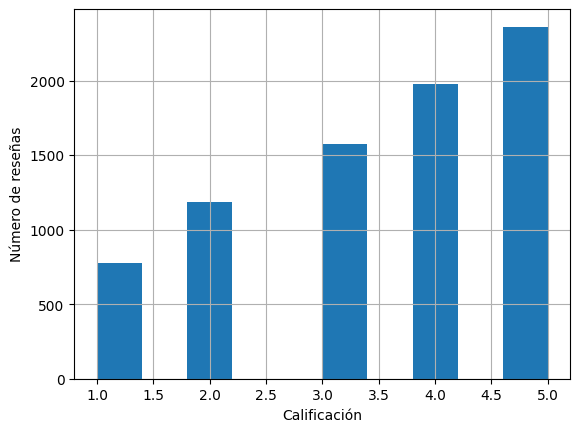

In [447]:
data_t.Class.hist()
plt.xlabel("Calificación")
plt.ylabel("Número de reseñas")
plt.show()

In [448]:
percentages = data_t['Class'].value_counts(normalize=True) * 100
percentages

Class
5    29.980952
4    25.104762
3    19.987302
2    15.047619
1     9.879365
Name: proportion, dtype: float64

Se observa un desbalance considerable entre las 5 clases. Mientras más alta es la calificación, mayor cantidad de reseñas. Observamos que la clase más poblada (correspondiente a la calificación 5) tiene el 30% de los registros, mientras que la clase menos poblada (correspondiente a la calificación 1) tiene el 10% de los registros.

Revisamos si hay registros vacíos:

In [449]:
# Ver el porcentaje de atributos vacios
((data_t.isna().sum()*100/data_t.shape[0])).sort_values(ascending=False)

Review    0.0
Class     0.0
dtype: float64

Revisamos si hay registros duplicados:

In [450]:
# buscar reviews repetidas usando duplicated
duplicados = data_t.duplicated(keep = False).sum()
print(f"Total de reseñas duplicadas encontradas inicialmente: {duplicados}")

# Se eliminan los duplicados
data_t.drop_duplicates(inplace=True)

# se verifica que no queden duplicados
duplicados = data_t.duplicated(keep = False).sum()
print(f"Total de reseñas duplicadas en el dataframe: {duplicados}")

Total de reseñas duplicadas encontradas inicialmente: 102
Total de reseñas duplicadas en el dataframe: 0


Revisamos si hay reseñas que no estén en español (como se espera que estén):

In [451]:
data_t['Idioma'] = data_t['Review'].apply(detect)
data_t['Idioma'].value_counts()

Idioma
es    7795
en       3
it       2
sq       1
pt       1
Name: count, dtype: int64

Revisamos algunas reseñas en inglés:

In [452]:
data_t[data_t['Idioma']=="en"]

,Review,Class,Idioma
3749,First part of the tour was Rivera's actual hom...,2,en
6518,A few months after ciudad perdida we keep on t...,5,en
7455,This university is unique around the world. Th...,5,en


Finalmente, eliminamos las reseñas que no están en español:

In [453]:
# eliminamos las reseñas en otros idiomas
data_t = data_t[data_t['Idioma'] == 'es']

#### Entendimiento de los Datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.


In [454]:

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]
textos['Moda'] = [statistics.mode([i for i in x.split(' ') if i != ""]) for x in textos['Review']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
#ProfileReport(textos)

In [455]:
textos

,Review,Class,Idioma,Conteo,Moda,Max,Min
0,Muy buena atención y aclaración de dudas por p...,5,es,252,de,20,0
1,Buen hotel si están obligados a estar cerca de...,3,es,297,de,13,1
2,"Es un lugar muy lindo para fotografías, visite...",5,es,104,Es,12,1
3,Abusados con la factura de alimentos siempre s...,3,es,422,y,14,1
4,Tuvimos un par de personas en el grupo que rea...,3,es,419,el,14,1
...,...,...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,es,113,el,11,2
7871,"Fue una escapada de un día desde el complejo, ...",4,es,261,de,12,2
7872,La Plaza de la Revolución es un lugar emblemát...,3,es,777,de,14,1
7873,Es la segunda ocasión que me quedo en los cuar...,1,es,651,que,12,0


## 3. Preparación de datos

Para poder realizar el pre-procesamiento de los datos, pasamos por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.


### 3.1 Limpieza de los datos
Para dejar el archivo en texto plano, sobre todo cuando vienen de diferentes fuentes como HTML, Twitter, XML, entre otros. También para eliminar caracteres especiales y pasar todo a minúscula.


In [456]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [x.lower() for x in words]


def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words


def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation in Spanish"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = []

    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

def remove_non_alphanumeric(words):
    return [re.sub(r'[^\w\s]', '', item) for item in words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### 3.2 Tokenización
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [457]:
data_t['words'] = data_t['Review'].apply(word_tokenize)
data_t.head()

<ipython-input-457-3fe17a8fda1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t['words'] = data_t['Review'].apply(word_tokenize)


,Review,Class,Idioma,words
0,Muy buena atención y aclaración de dudas por p...,5,es,"[Muy, buena, atención, y, aclaración, de, duda..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[Buen, hotel, si, están, obligados, a, estar, ..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[Es, un, lugar, muy, lindo, para, fotografías,..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[Abusados, con, la, factura, de, alimentos, si..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[Tuvimos, un, par, de, personas, en, el, grupo..."


In [458]:
data_t['words'].dropna()

0       [Muy, buena, atención, y, aclaración, de, duda...
1       [Buen, hotel, si, están, obligados, a, estar, ...
2       [Es, un, lugar, muy, lindo, para, fotografías,...
3       [Abusados, con, la, factura, de, alimentos, si...
4       [Tuvimos, un, par, de, personas, en, el, grupo...
                              ...                        
7870    [Me, parece, buen, sistema, ,, agiliza, el, tr...
7871    [Fue, una, escapada, de, un, día, desde, el, c...
7872    [La, Plaza, de, la, Revolución, es, un, lugar,...
7873    [Es, la, segunda, ocasión, que, me, quedo, en,...
7874    [Llegamos, por, casualidad, a, Los, Mercaderes...
Name: words, Length: 7795, dtype: object

In [459]:
data_t.shape

(7795, 4)

In [460]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
Index: 7795 entries, 0 to 7874
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
7795 non-null   object
dtypes: object(1)
memory usage: 121.8+ KB


In [461]:
data_t['words']=data_t['words'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

<ipython-input-461-02c09b07a61f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t['words']=data_t['words'].apply(preprocessing) #Aplica la eliminación del ruido


,Review,Class,Idioma,words
0,Muy buena atención y aclaración de dudas por p...,5,es,"[buena, atencion, aclaracion, dudas, parte, se..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[buen, hotel, si, estan, obligados, cerca, cen..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[lugar, lindo, fotografias, visiten, selina, m..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[abusados, factura, alimentos, siempre, echan,..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[par, personas, grupo, realmente, queriamos, c..."


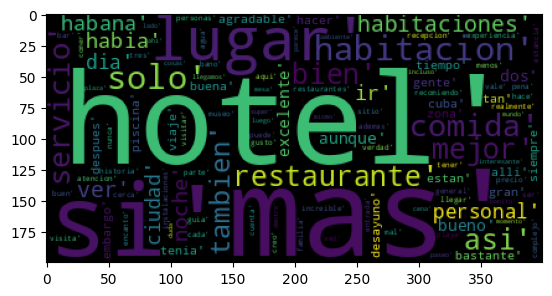

In [462]:
wc = WordCloud().generate("".join(data_t['words'].astype('string')))
plt.imshow(wc)

In [463]:
data_t

,Review,Class,Idioma,words
0,Muy buena atención y aclaración de dudas por p...,5,es,"[buena, atencion, aclaracion, dudas, parte, se..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[buen, hotel, si, estan, obligados, cerca, cen..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[lugar, lindo, fotografias, visiten, selina, m..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[abusados, factura, alimentos, siempre, echan,..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[par, personas, grupo, realmente, queriamos, c..."
...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,es,"[parece, buen, sistema, agiliza, transporte, c..."
7871,"Fue una escapada de un día desde el complejo, ...",4,es,"[escapada, dia, complejo, grupo, turistas, hab..."
7872,La Plaza de la Revolución es un lugar emblemát...,3,es,"[plaza, revolucion, lugar, emblematico, identi..."
7873,Es la segunda ocasión que me quedo en los cuar...,1,es,"[segunda, ocasion, quedo, cuartos, area, jardi..."


In [464]:
data_copy = data_t.copy()

In [465]:
data_t = data_copy.copy()

Si son palabras muy comunes, no aportan variabilidad a los datos, por lo que son eliminadas para mejorar el modelo:

In [466]:
palabras_a_eliminar = ["h","aqui","viajero","ano","dos","tener","familia","alimento","altura","adulto","comer","torre","calle","general","gente","vistas",'museo','parte','visitar','visita','viaje','vista','playa','restaurantes','personas','historia','siempre','gran','piscina','zona','cada','ser','hacer','aunque','puede','bastante','tan','cuba','alli','ubicacion','agradable','atencion','estan','tenia','agua','recepcion','desayuno','mas','dia','habana','habitaciones','ir','personal','hotel', 'lugar','si','tambien','mejor','restaurante','habitacion','habit','ver','comida','solo','servicio','ciudad','habia','tiempo','noche','despues','asi']

# Función para eliminar las palabras de una lista
def eliminar_palabras(lista):
    return [palabra for palabra in lista if palabra not in palabras_a_eliminar]

def eliminar_risas(lista):
  words = []
  for word in lista:
    if not('jaj' in word) or not('hah' in word):
      words.append(word)
  return words

# Aplicar la función a la columna del DataFrame
data_t['words'] = data_t['words'].apply(lambda lista: eliminar_risas(lista))
data_t['words'] = data_t['words'].apply(lambda lista: eliminar_palabras(lista))

Dependiendo de cuál clae era más representativa, eliminamos las palabras de la clase adyacente.

In [467]:
palabras_a_eliminar = ["resultado","socio","precio","generoso","atento","maravilloso","maravilla","calidad","excelente","bar","amable","increible","recomiendo","hermosa","viajero","buena","bien","bueno","buen"]
data_t.loc[data_t['Class'] == 1, 'words'] = data_t[data_t['Class'] == 1]['words'].apply(lambda words: eliminar_palabras(words))

palabras_a_eliminar = ["atento","menos","maravilloso","emblematico","maravilla","calidad","excelente","llegamos","elevado","ultimo","ultima","comoda","amable","increible","malisimo","recomiendo","hermosa","decepcionado","pierda","vieja","menos","bano","mala","dieron","nunca","mal","buena","bien","bueno","buen"]
data_t.loc[data_t['Class'] == 2, 'words'] = data_t[data_t['Class'] == 2]['words'].apply(lambda words: eliminar_palabras(words))

palabras_a_eliminar = ["socio","creo","remodelada","ruidosa","roto","llena","danado","divertida","deteriorada","incomodo","ronda","negativo","precio","independiente","bar","llegar","grande","bonito","caro","dos","plaza","interesante","complejo","pena","vale","cerca","precios","recomiendo","embargo","experiencia","mal","excelente","vista","visita","precio","playa"]
data_t.loc[data_t['Class'] == 3, 'words'] = data_t[data_t['Class'] == 3]['words'].apply(lambda words: eliminar_palabras(words))

palabras_a_eliminar = ["pendiente","atento","elevado","asiento","duda","pierda","creo","hermoso","aqui","realmente","ambiente","amable","recomiendo","experiencia","excelente","buena","bien","bueno","buen"]
data_t.loc[data_t['Class'] == 4, 'words'] = data_t[data_t['Class'] == 4]['words'].apply(lambda words: eliminar_palabras(words))

palabras_a_eliminar = ["dos","precio","cerca","bonito","puedes","pena","vale","buena","bien","bueno","buen"]
data_t.loc[data_t['Class'] == 5, 'words'] = data_t[data_t['Class'] == 5]['words'].apply(lambda words: eliminar_palabras(words))

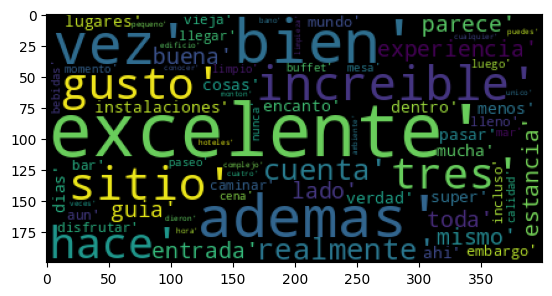

In [468]:
wc = WordCloud().generate("".join(data_t['words'].astype('string')))
plt.imshow(wc)

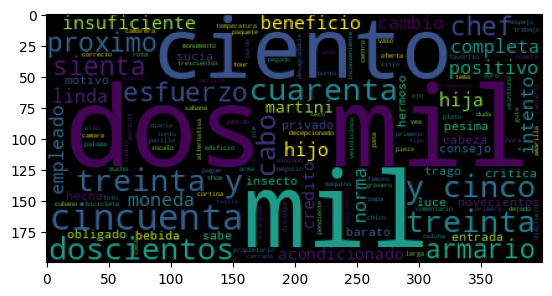

In [469]:
# in between
flat_words = [word for sublist in data_t[data_t['Class'] == 1]['words'] for word in sublist]
class_1_words = set(flat_words)
flat_words = [word for sublist in data_t[data_t['Class'] == 3]['words'] for word in sublist]
class_3_words = set(flat_words)
common_words = class_1_words.intersection(class_3_words)
wc = WordCloud().generate(' '.join(common_words))
plt.imshow(wc)

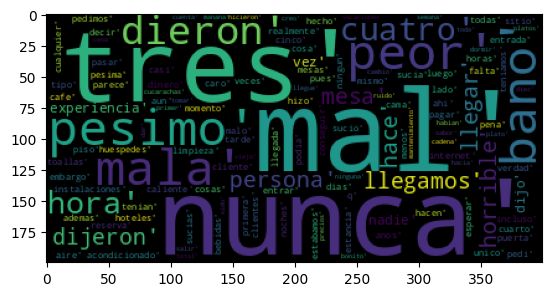

In [470]:
data1 = data_t.loc[data_t['Class']==1]
wc = WordCloud().generate("".join(data1["words"].astype('string')))
plt.imshow(wc)

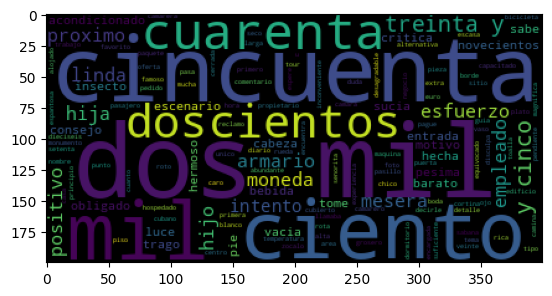

In [471]:
# in between
flat_words = [word for sublist in data_t[data_t['Class'] == 2]['words'] for word in sublist]
class_2_words = set(flat_words)
flat_words = [word for sublist in data_t[data_t['Class'] == 1]['words'] for word in sublist]
class_1_words = set(flat_words)
common_words = class_2_words.intersection(class_1_words)
wc = WordCloud().generate(' '.join(common_words))
plt.imshow(wc)

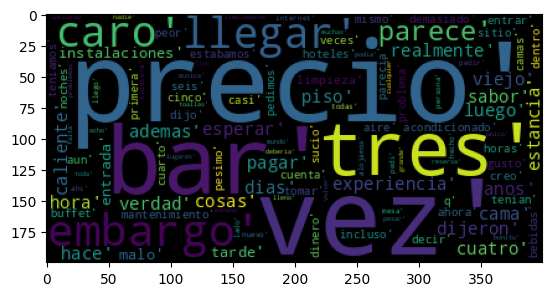

In [472]:
data2 = data_t.loc[data_t['Class']==2]
wc = WordCloud().generate("".join(data2["words"].astype('string')))
plt.imshow(wc)

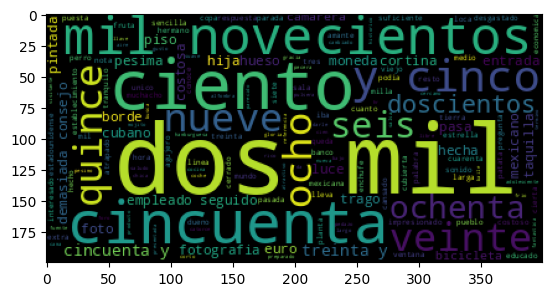

In [473]:
# in between
flat_words = [word for sublist in data_t[data_t['Class'] == 2]['words'] for word in sublist]
class_2_words = set(flat_words)
flat_words = [word for sublist in data_t[data_t['Class'] == 3]['words'] for word in sublist]
class_3_words = set(flat_words)
common_words = class_2_words.intersection(class_3_words)
wc = WordCloud().generate(' '.join(common_words))
plt.imshow(wc)

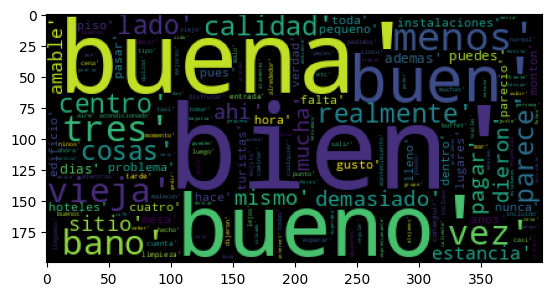

In [474]:
data3 = data_t.loc[data_t['Class']==3]
wc = WordCloud().generate("".join(data3["words"].astype('string')))
plt.imshow(wc)

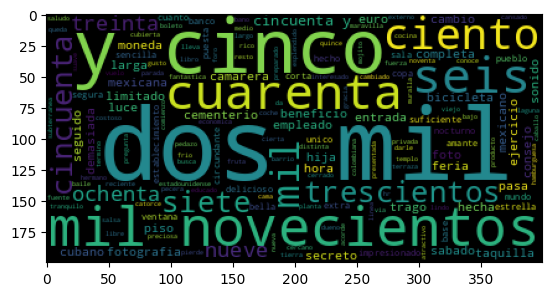

In [475]:
# in between
flat_words = [word for sublist in data_t[data_t['Class'] == 4]['words'] for word in sublist]
class_4_words = set(flat_words)
common_words = class_3_words.intersection(class_4_words)
wc = WordCloud().generate(' '.join(common_words))
plt.imshow(wc)

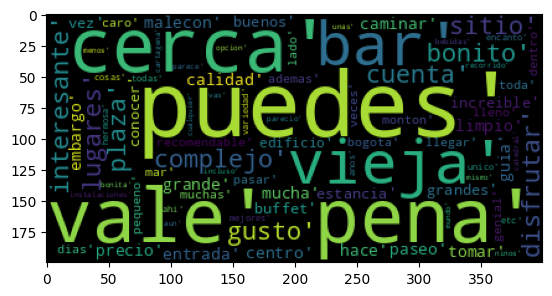

In [476]:
data4 = data_t.loc[data_t['Class']==4]
wc = WordCloud().generate("".join(data4["words"].astype('string')))
plt.imshow(wc)

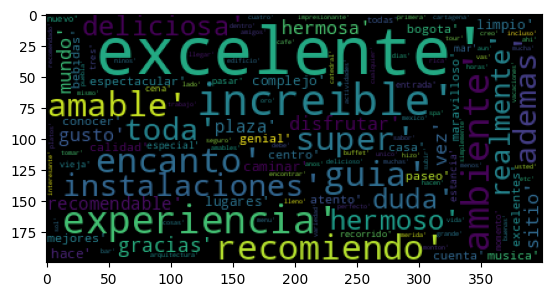

In [477]:
data5 = data_t.loc[data_t['Class']==5]
wc = WordCloud().generate("".join(data5["words"].astype('string')))
plt.imshow(wc)

###  3.3. Normalización
En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.


In [478]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    sbs = SnowballStemmer(language="spanish")
    new_words = []
    for word in words:
      new_word = sbs.stem(word)
      new_words.append(new_word)
    return new_words


def lemmatize_verbs(words):
    """Lemmatize verbs in text (Spanish)"""
    nlp = spacy.load("es_core_news_sm")
    text = join_words(words)
    doc = nlp(text)
    lemmas = [token.lemma_ if token.pos_ == "VERB" else token.text for token in doc]
    return lemmas

def join_words(words):
    """Join a list of words into a single string"""
    return ' '.join(map(str, words))

def stem_and_lemmatize(words):
    stems = stem_words(words)
    #lemmas = lemmatize_verbs(words)
    #return lemmas
    return stems

data_t['words'] = data_t['words'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,Review,Class,Idioma,words
0,Muy buena atención y aclaración de dudas por p...,5,es,"[aclar, dud, senorit, veron, castill, atent, a..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[buen, oblig, centr, convencion, necesit, mejo..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[lind, fotografi, visit, selin, music, viv, ce..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[abus, factur, aliment, echan, culp, van, busc..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[par, grup, realment, queri, cabrit, rest, bue..."


In [479]:
data_t

,Review,Class,Idioma,words
0,Muy buena atención y aclaración de dudas por p...,5,es,"[aclar, dud, senorit, veron, castill, atent, a..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[buen, oblig, centr, convencion, necesit, mejo..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[lind, fotografi, visit, selin, music, viv, ce..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[abus, factur, aliment, echan, culp, van, busc..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[par, grup, realment, queri, cabrit, rest, bue..."
...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,es,"[parec, sistem, agiliz, transport, conect, met..."
7871,"Fue una escapada de un día desde el complejo, ...",4,es,"[escap, complej, grup, turist, habi, gui, info..."
7872,La Plaza de la Revolución es un lugar emblemát...,3,es,"[revolucion, emblemat, identif, part, segund, ..."
7873,Es la segunda ocasión que me quedo en los cuar...,1,es,"[segund, ocasion, qued, cuart, are, jardin, co..."


## 4. Creación y Aplicación del Modelos

#### División en Train y Test

Debido al considerable desbalance entre clases, primero se distribuye de manera más equitativa las clases para evitar el sesgo del modelo y que sea más efectivo:

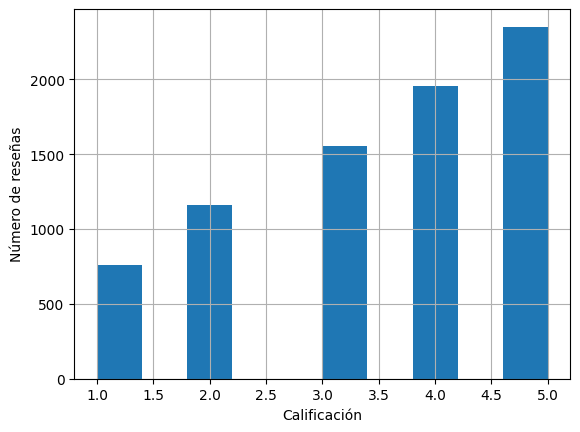

In [480]:
data_t.Class.hist()
plt.xlabel("Calificación")
plt.ylabel("Número de reseñas")
plt.show()

In [481]:
percentages = data_t['Class'].value_counts(normalize=True) * 100
percentages

Class
5    30.173188
4    25.131495
3    19.974343
2    14.932649
1     9.788326
Name: proportion, dtype: float64

In [482]:
values = data_t['Class'].value_counts()
values

Class
5    2352
4    1959
3    1557
2    1164
1     763
Name: count, dtype: int64

In [483]:
data_equi = data_t.copy()

Se puede ver claramente que las clases no estan repartidas equitativamente, lo que puede sesgar al modelo

In [484]:
tamano_original = len(data_equi)
# Calcula cuántas filas representan el 25% de todas las filas del DataFrame original
total_filas_25_por_ciento = int(0.15 * tamano_original)

# Identifica cuántas filas actualmente corresponden a la clase 5
num_filas_clase5 = len(data_equi[data_equi['Class'] == 5])

# Calcula cuántas filas de la clase 5 se deben mantener para que represente el 10% de todas las filas
num_filas_clase5_nuevo = total_filas_25_por_ciento

filas_eliminar_clase5 = data_equi[data_equi['Class'] == 5].sample(num_filas_clase5 - num_filas_clase5_nuevo)
data_equi = data_equi.drop(filas_eliminar_clase5.index)

# Calcula cuántas filas representan el 25% de todas las filas del DataFrame original
total_filas_25_por_ciento = int(0.18 * tamano_original)

# Identifica cuántas filas actualmente corresponden a la clase 5
num_filas_clase4 = len(data_equi[data_equi['Class'] == 4])

# Calcula cuántas filas de la clase 5 se deben mantener para que represente el 10% de todas las filas
num_filas_clase4_nuevo = total_filas_25_por_ciento

filas_eliminar_clase4 = data_equi[data_equi['Class'] == 4].sample(num_filas_clase4 - num_filas_clase4_nuevo)
data_equi = data_equi.drop(filas_eliminar_clase4.index)


# Calcula cuántas filas representan el 25% de todas las filas del DataFrame original
total_filas_25_por_ciento = int(0.16 * tamano_original)

# Identifica cuántas filas actualmente corresponden a la clase 5
num_filas_clase3 = len(data_equi[data_equi['Class'] == 3])

# Calcula cuántas filas de la clase 5 se deben mantener para que represente el 10% de todas las filas
num_filas_clase3_nuevo = total_filas_25_por_ciento

filas_eliminar_clase3 = data_equi[data_equi['Class'] == 3].sample(num_filas_clase3 - num_filas_clase3_nuevo)
data_equi = data_equi.drop(filas_eliminar_clase3.index)


# Calcula cuántas filas representan el 14% de todas las filas del DataFrame original
total_filas_13_por_ciento = int(0.14 * tamano_original)

# Identifica cuántas filas actualmente corresponden a la clase 5
num_filas_clase2 = len(data_equi[data_equi['Class'] == 2])

# Calcula cuántas filas de la clase 3 se deben mantener para que represente el 13% de todas las filas
num_filas_clase2_nuevo = total_filas_13_por_ciento

filas_eliminar_clase2 = data_equi[data_equi['Class'] == 2].sample(num_filas_clase2 - num_filas_clase2_nuevo)
data_equi = data_equi.drop(filas_eliminar_clase2.index)

In [485]:
percentages = data_equi['Class'].value_counts(normalize=True) * 100
percentages

Class
4    24.731183
3    21.981315
5    20.606381
2    19.231447
1    13.449674
Name: proportion, dtype: float64

Se puede observar que tenemos una mejor distribución de entre la distintas clases

In [486]:
values = data_equi['Class'].value_counts()
values

Class
4    1403
3    1247
5    1169
2    1091
1     763
Name: count, dtype: int64

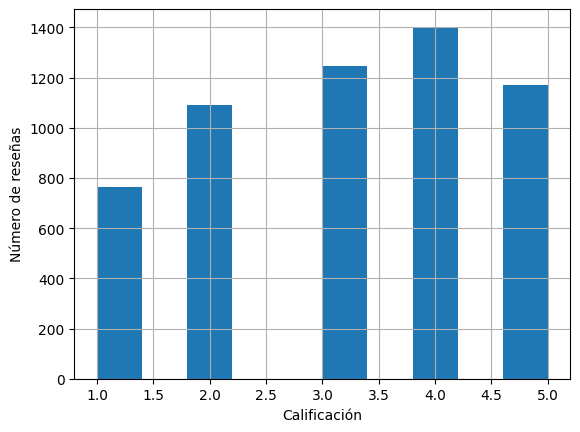

In [487]:
data_equi.Class.hist()
plt.xlabel("Calificación")
plt.ylabel("Número de reseñas")
plt.show()

In [488]:
data_equi

,Review,Class,Idioma,words
0,Muy buena atención y aclaración de dudas por p...,5,es,"[aclar, dud, senorit, veron, castill, atent, a..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[buen, oblig, centr, convencion, necesit, mejo..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[abus, factur, aliment, echan, culp, van, busc..."
5,Un complejo enorme de fortificaciones frente a...,4,es,"[complej, enorm, fortif, frent, antigu, visit,..."
6,Acabo de volver de Cuba. La primera semana en ...,2,es,"[acab, volv, primer, seman, tryp, libr, pued, ..."
...,...,...,...,...
7868,Las habitaciones ejecutivas del hotel son súpe...,5,es,"[ejecut, sup, comod, ampli, limpi, excelent, r..."
7869,El título de este post resume mi. Está en una ...,3,es,"[titul, post, resum, encant, cuest, pag, marav..."
7871,"Fue una escapada de un día desde el complejo, ...",4,es,"[escap, complej, grup, turist, habi, gui, info..."
7872,La Plaza de la Revolución es un lugar emblemát...,3,es,"[revolucion, emblemat, identif, part, segund, ..."


#### Codificación vectorial

Seleccionamos una codificación de tipo TF-IDF

In [489]:
x_data, y_data = data_equi['words'],data_equi['Class']
y_data

0       5
1       3
3       3
5       4
6       2
       ..
7868    5
7869    3
7871    4
7872    3
7873    1
Name: Class, Length: 5673, dtype: int64

In [490]:
x_data= x_data.astype('string')
x_data

0       ['aclar', 'dud', 'senorit', 'veron', 'castill'...
1       ['buen', 'oblig', 'centr', 'convencion', 'nece...
3       ['abus', 'factur', 'aliment', 'echan', 'culp',...
5       ['complej', 'enorm', 'fortif', 'frent', 'antig...
6       ['acab', 'volv', 'primer', 'seman', 'tryp', 'l...
                              ...                        
7868    ['ejecut', 'sup', 'comod', 'ampli', 'limpi', '...
7869    ['titul', 'post', 'resum', 'encant', 'cuest', ...
7871    ['escap', 'complej', 'grup', 'turist', 'habi',...
7872    ['revolucion', 'emblemat', 'identif', 'part', ...
7873    ['segund', 'ocasion', 'qued', 'cuart', 'are', ...
Name: words, Length: 5673, dtype: string

In [491]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_data)
print(x_tfidf.shape)
x_tfidf.toarray()[0]

(5673, 12232)


array([0., 0., 0., ..., 0., 0., 0.])

Seleccionamos 20% de nuestros datos para el conjunto de test

In [492]:
X_train, X_test, Y_train, Y_test = train_test_split(x_tfidf, y_data, test_size=0.2, random_state=7777, stratify=y_data)

In [493]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4538, 12232)
(4538,)
(1135, 12232)
(1135,)


### Modelo 1: Regresión Logística (estudiante: Samuel Jiménez)


Vamos a hacer la búsqueda de hiperparámetros para ver elegir los parámetros que vamos a usar.

In [494]:
# Definimos los parámetros que queremos probar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

In [495]:
#Creamos el gridSearch

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

In [496]:
# Buscamos los parámetros

grid_search.fit(X_train, Y_train)
# Resultado de la busqueda
print("Mejor Score: %f" % grid_search.best_score_)
print("Mejores Hiperparámetros: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Mejor Score: 0.595633
Mejores Hiperparámetros:  {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}


In [497]:
# Construcción de la regresión con los mejores hiperparámetros

best_regresion = grid_search.best_estimator_
y_pred_train = best_regresion.predict(X_train)
y_pred_test = best_regresion.predict(X_test)
print("Precisión en el conjunto de entrenamiento: ", precision_score(Y_train, y_pred_train,average='weighted'))
print("Precisión en el conjunto de test: ", precision_score(Y_test, y_pred_test,average='weighted'))
print("Accuracy en el conjunto de entrenamiento: ", accuracy_score(Y_train, y_pred_train))
print("Accuracy en el conjunto de test: ", accuracy_score(Y_test, y_pred_test))
print("f1 en el conjunto de entrenamiento: ", f1_score(Y_train, y_pred_train,average='weighted'))
print("f1 en el conjunto de test: ", f1_score(Y_test, y_pred_test,average='weighted'))

Precisión en el conjunto de entrenamiento:  0.8810840803400329
Precisión en el conjunto de test:  0.6286570559360298
Accuracy en el conjunto de entrenamiento:  0.875716174526223
Accuracy en el conjunto de test:  0.6079295154185022
f1 en el conjunto de entrenamiento:  0.8762221658010187
f1 en el conjunto de test:  0.6098510075544006


<ipython-input-498-f63a2f73c2cd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([0,1,2,3,4,5])
<ipython-input-498-f63a2f73c2cd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels([0,1,2,3,4,5])


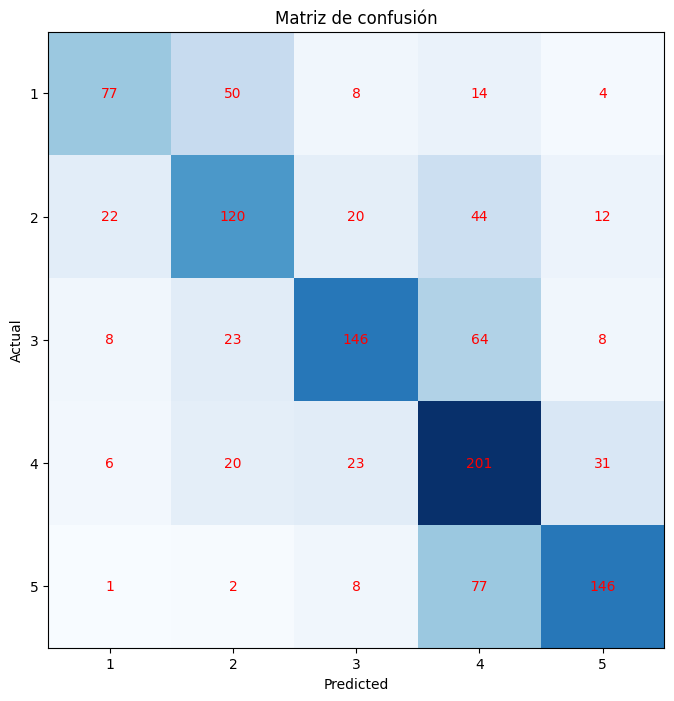

In [498]:
fig, ax = plt.subplots(figsize=(8, 8))
cm = confusion_matrix(Y_test, y_pred_test)
ax.imshow(cm, cmap='Blues')

for i in range(len(cm)):
    for j in range(len(cm)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

ax.xaxis.set_ticklabels([0,1,2,3,4,5])
ax.yaxis.set_ticklabels([0,1,2,3,4,5])
plt.title("Matriz de confusión")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [499]:
# Vamos a generar el reporte de clasificación
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.68      0.50      0.58       153
           2       0.56      0.55      0.55       218
           3       0.71      0.59      0.64       249
           4       0.50      0.72      0.59       281
           5       0.73      0.62      0.67       234

    accuracy                           0.61      1135
   macro avg       0.63      0.60      0.61      1135
weighted avg       0.63      0.61      0.61      1135



### Modelo 2: Ridges Classifier (estudiante: Eduardo Herrera)


In [500]:
particiones = KFold(n_splits=5, shuffle=True, random_state=27)

# Definimos los parámetros que queremos probar
param_grid = {
    'alpha': np.arange(0.01, 10.01, 0.5),
    'solver': ['auto', 'svd', 'sparse_cg', 'sag']
}

clf = RidgeClassifier(tol=1e-2)

In [501]:
grid_search = GridSearchCV(clf, param_grid, cv=particiones, n_jobs=-1)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=Warning)
    grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
best_clf = grid_search.best_estimator_

{'alpha': 7.01, 'solver': 'sag'}
0.591452675956462


In [502]:
# Construcción de la regresión con los mejores hiperparámetros

best_ridge = grid_search.best_estimator_
y_pred_train = best_ridge.predict(X_train)
y_pred_test = best_ridge.predict(X_test)
print("Precisión en el conjunto de entrenamiento: ", precision_score(Y_train, y_pred_train,average='weighted'))
print("Precisión en el conjunto de test: ", precision_score(Y_test, y_pred_test,average='weighted'))
print("Accuracy en el conjunto de entrenamiento: ", accuracy_score(Y_train, y_pred_train))
print("Accuracy en el conjunto de test: ", accuracy_score(Y_test, y_pred_test))
print("f1 en el conjunto de entrenamiento: ", f1_score(Y_train, y_pred_train,average='weighted'))
print("f1 en el conjunto de test: ", f1_score(Y_test, y_pred_test,average='weighted'))

Precisión en el conjunto de entrenamiento:  0.8387381871223462
Precisión en el conjunto de test:  0.630496972718989
Accuracy en el conjunto de entrenamiento:  0.8289995592772146
Accuracy en el conjunto de test:  0.6044052863436123
f1 en el conjunto de entrenamiento:  0.8299952734813183
f1 en el conjunto de test:  0.6069546569118227


<ipython-input-503-f63a2f73c2cd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([0,1,2,3,4,5])
<ipython-input-503-f63a2f73c2cd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels([0,1,2,3,4,5])


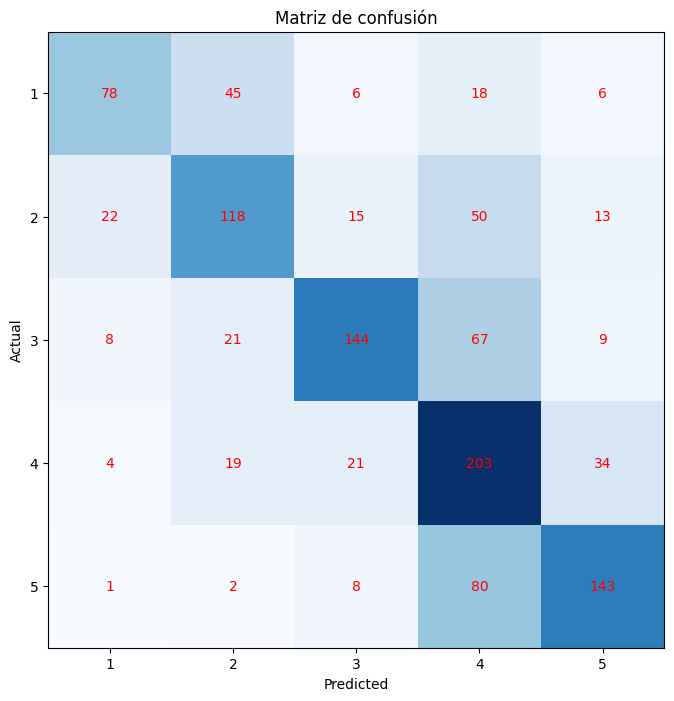

In [503]:
fig, ax = plt.subplots(figsize=(8, 8))
cm = confusion_matrix(Y_test, y_pred_test)
ax.imshow(cm, cmap='Blues')

for i in range(len(cm)):
    for j in range(len(cm)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

ax.xaxis.set_ticklabels([0,1,2,3,4,5])
ax.yaxis.set_ticklabels([0,1,2,3,4,5])
plt.title("Matriz de confusión")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [504]:
# se genera el reporte de clasificación
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.69      0.51      0.59       153
           2       0.58      0.54      0.56       218
           3       0.74      0.58      0.65       249
           4       0.49      0.72      0.58       281
           5       0.70      0.61      0.65       234

    accuracy                           0.60      1135
   macro avg       0.64      0.59      0.61      1135
weighted avg       0.63      0.60      0.61      1135



### Modelo 3: Gaussian Naive Bayes (estudiante David Cuevas)

In [505]:
clf = GaussianNB(var_smoothing=8)
clf.fit(X_train.toarray(),Y_train)

GaussianNB(var_smoothing=8)

In [506]:
#Construcción del árbol con los mejores hiperparámetros
y_pred_train = clf.predict(X_train.toarray())
y_pred_test = clf.predict(X_test.toarray())
print("Precisión en el conjunto de entrenamiento: ", precision_score(Y_train, y_pred_train,average='weighted'))
print("Precisión en el conjunto de test: ", precision_score(Y_test, y_pred_test,average='weighted'))
print("Accuracy en el conjunto de entrenamiento: ", accuracy_score(Y_train, y_pred_train))
print("Accuracy en el conjunto de test: ", accuracy_score(Y_test, y_pred_test))
print("f1 en el conjunto de entrenamiento: ", f1_score(Y_train, y_pred_train,average='weighted'))
print("f1 en el conjunto de test: ", f1_score(Y_test, y_pred_test,average='weighted'))

Precisión en el conjunto de entrenamiento:  0.7277967898972596
Precisión en el conjunto de test:  0.5730787403937619
Accuracy en el conjunto de entrenamiento:  0.6738651388276774
Accuracy en el conjunto de test:  0.5233480176211454
f1 en el conjunto de entrenamiento:  0.6608209808873421
f1 en el conjunto de test:  0.4993923636012661


<ipython-input-507-f63a2f73c2cd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([0,1,2,3,4,5])
<ipython-input-507-f63a2f73c2cd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels([0,1,2,3,4,5])


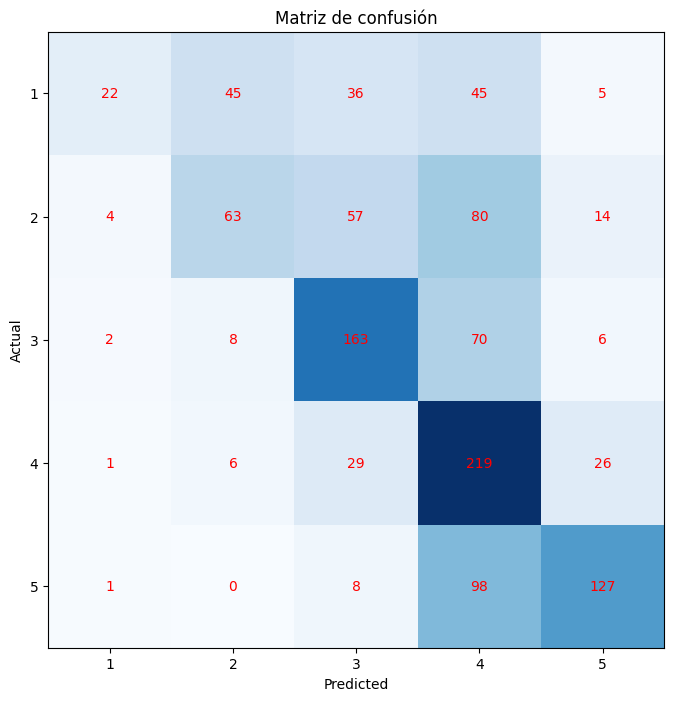

In [507]:
fig, ax = plt.subplots(figsize=(8, 8))
cm = confusion_matrix(Y_test, y_pred_test)
ax.imshow(cm, cmap='Blues')

for i in range(len(cm)):
    for j in range(len(cm)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

ax.xaxis.set_ticklabels([0,1,2,3,4,5])
ax.yaxis.set_ticklabels([0,1,2,3,4,5])
plt.title("Matriz de confusión")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [508]:
# se genera el reporte de clasificación
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.73      0.14      0.24       153
           2       0.52      0.29      0.37       218
           3       0.56      0.65      0.60       249
           4       0.43      0.78      0.55       281
           5       0.71      0.54      0.62       234

    accuracy                           0.52      1135
   macro avg       0.59      0.48      0.48      1135
weighted avg       0.57      0.52      0.50      1135



### Exportación de modelos

In [509]:
joblib.dump(best_regresion, 'modelo_regresion.joblib')
joblib.dump(best_ridge, 'modelo_ridge.joblib')
joblib.dump(clf, 'modelo_bayes.joblib')

['modelo_bayes.joblib']

### Predicción de datos no etiquetados

Con el mejor modelo obtenido, predecimos los datos no etiquetados para la posterior evaluación de nuestros modelo

Repetimos el proceso anteriormente para preparar los datos para que el modelo los entienda apropiadamente (lo que en la próxima entrega se realizará con un pipeline).

In [510]:
best_model = joblib.load('modelo_regresion.joblib')

In [511]:
path_p = os.path.join('particion_prueba_estudiantes.csv')

In [512]:
new_data = pd.read_csv(path_p, sep=',', encoding='utf-8')
data_p = new_data.copy()

In [513]:
data_p['words'] = data_p['Review'].apply(word_tokenize)
data_p['words']=data_p['words'].apply(preprocessing)
data_p['words'] = data_p['words'].apply(lambda lista: eliminar_risas(lista))
data_p['words'] = data_p['words'].apply(lambda lista: eliminar_palabras(lista))
data_p['words'] = data_p['words'].apply(stem_and_lemmatize)

In [514]:
x_data_p = data_p['words'].astype('string')

In [515]:
x_tfidf_p = tfidf.transform(x_data_p)
y_pred_p = best_model.predict(x_tfidf_p)
y_pred_p

array([1, 4, 2, ..., 5, 3, 3])

In [516]:
new_data['Class'] = y_pred_p
new_data

,Review,Class
0,La primera noche nos encontramos en la habitac...,1
1,A una calle de catedral con platillos tradicio...,4
2,Porciones muy miserables\r\nAgua con sabor a c...,2
3,Cartagena encanta. De todas las ciudades colon...,5
4,Ibamos con mucha ilusion de disfrutar el espec...,5
...,...,...
1745,Subir en funicular y bajar en teleferico fue u...,5
1746,"La gente espera el lugar central en La Habana,...",3
1747,Todo excelente con el hotel: las albercas para...,5
1748,Nos detuvimos en un bocado antes de la puesta ...,3


In [517]:
new_data.to_csv('particion_prueba_grupo16.csv', index=False)